<a href="https://colab.research.google.com/github/manikur/Python-Programming/blob/main/ChinaGdpTimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PythonTsa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
x=pd.read_csv(dtapath + 'gdpquarterlychina1992.1-2017.4.csv',header=0)
dates = pd.date_range(start='1992',periods=len(x),freq='Q')
x.index=dates

In [ ]:
x.head()

,GDP
1992-03-31,5234.8
1992-06-30,6536.8
1992-09-30,7122.5
1992-12-31,8174.3
1993-03-31,6803.1


In [ ]:
x.tail()

,GDP
2016-12-31,211151.4
2017-03-31,180385.3
2017-06-30,200558.7
2017-09-30,211595.5
2017-12-31,234582.2


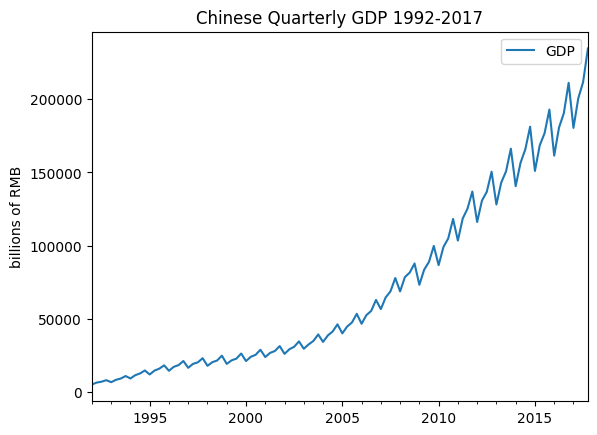

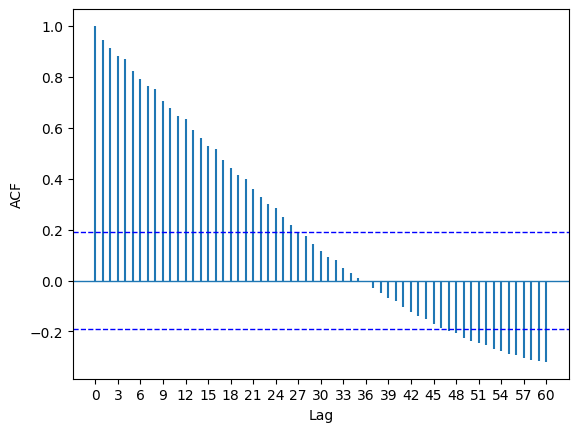

In [ ]:
import matplotlib.pyplot as plt
x.plot(); plt.title('Chinese Quarterly GDP 1992-2017')
plt.ylabel('billions of RMB')
plt.show()
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(x, both=False, lag=60) #plotting ACF
plt.show()

#BITCOIN PRICE

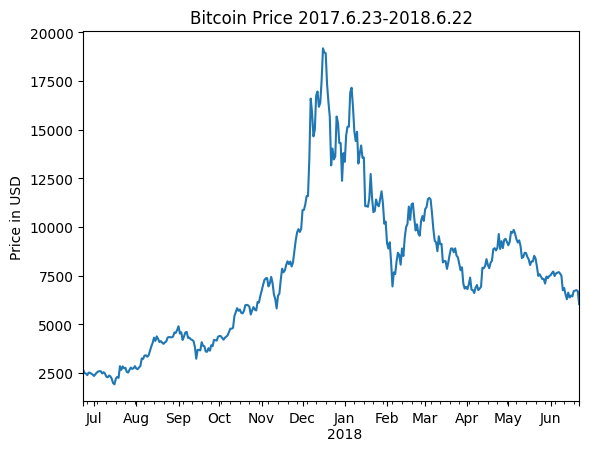

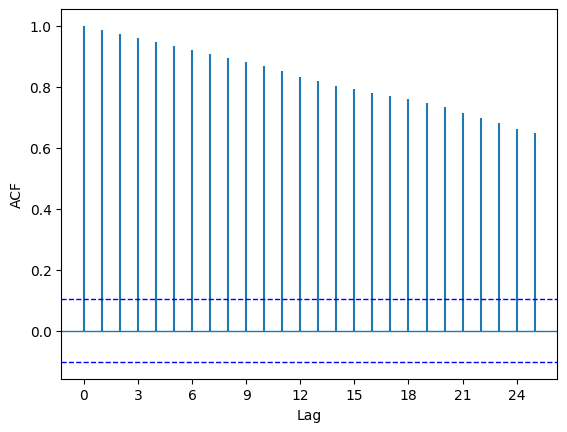

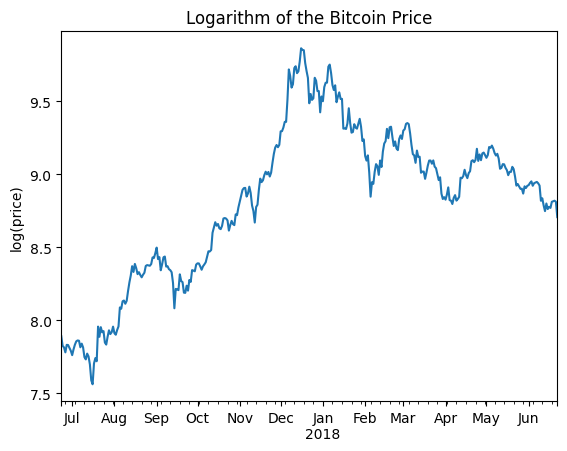

In [ ]:
import pandas as pd
import numpy as np
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
bitcoin=pd.read_excel(dtapath +'BitcoinPrice17-6-23-18-6-22.xlsx', header=0)
dat=pd.date_range('2017-06-23',periods=len(bitcoin),freq='D')
bitcoin.index=dat
price=bitcoin['ClosingP']
import matplotlib.pyplot as plt
price.plot(); plt.title('Bitcoin Price 2017.6.23-2018.6.22')
plt.ylabel('Price in USD'); plt.show()
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(price, lag=25)
plt.show()
logp=np.log(price)
logp.plot(); plt.title('Logarithm of the Bitcoin Price')
plt.ylabel('log(price)'); plt.show()


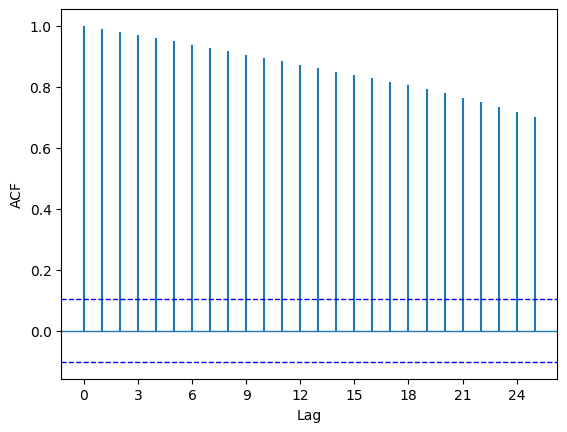

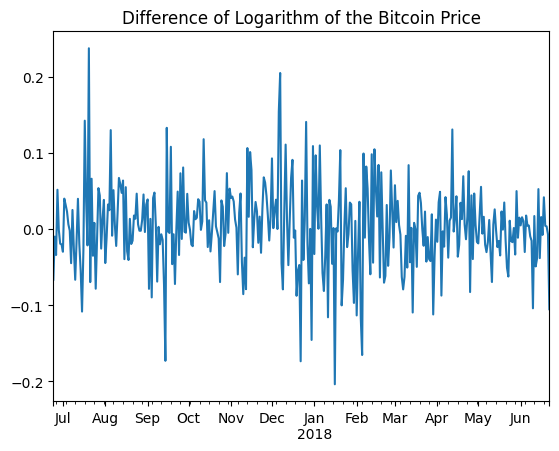

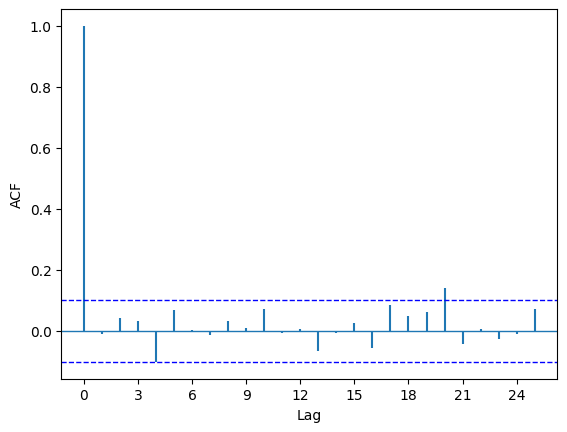

In [ ]:

acf_pacf_fig(logp, lag=25)
plt.show()
dlogp=logp.diff(1)
dlogp=dlogp.dropna() #delete "NaN"
dlogp.plot()
plt.title('Difference of Logarithm of the Bitcoin Price')
plt.show()
acf_pacf_fig(dlogp, lag=25)
plt.show()

# Time Series Data Visualization
#monthly recorded milk average per cow at a dairy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
milk=pd.read_excel(dtapath +'milk.xlsx',header=None)
type(milk)
milk


,0,1,2,3,4,5,6,7,8,9
0,589,561,640,656,727,697,640,599,568.0,577.0
1,553,582,600,566,653,673,742,716,660.0,617.0
2,583,587,565,598,628,618,688,705,770.0,736.0
3,678,639,604,611,594,634,658,622,709.0,722.0
4,782,756,702,653,615,621,602,635,677.0,635.0
5,736,755,811,798,735,697,661,667,645.0,688.0
6,713,667,762,784,837,817,767,722,681.0,687.0
7,660,698,717,696,775,796,858,826,783.0,740.0
8,701,706,677,711,734,690,785,805,871.0,845.0
9,801,764,725,723,690,734,750,707,807.0,824.0


In [ ]:
mseries=pd.concat([milk.loc[0],milk.loc[1],milk.loc[2],
milk.loc[3],milk.loc[4],milk.loc[5],milk.loc[6],
milk.loc[7],milk.loc[8],milk.loc[9],milk.loc[10],
milk.loc[11],milk.loc[12],milk.loc[13],milk.loc[14],
milk.loc[15],milk.loc[16]],ignore_index='true')

In [ ]:
mseries

,0
0,589.0
1,561.0
2,640.0
3,656.0
4,727.0
...,...
165,827.0
166,797.0
167,843.0
168,NaN


In [ ]:
# milk.loc[i] is the (i+1)th row in the DataFrame milk
type(mseries)
mts=mseries.drop([168,169])
# delete the last two NaN’s in mseries
mts

,0
0,589.0
1,561.0
2,640.0
3,656.0
4,727.0
...,...
163,858.0
164,817.0
165,827.0
166,797.0


In [ ]:
timeindex=pd.date_range('1962-01',periods=168,freq='M')
# setting time index for the Series mts
mts.index=timeindex
mts

,0
1962-01-31,589.0
1962-02-28,561.0
1962-03-31,640.0
1962-04-30,656.0
1962-05-31,727.0
...,...
1975-08-31,858.0
1975-09-30,817.0
1975-10-31,827.0
1975-11-30,797.0


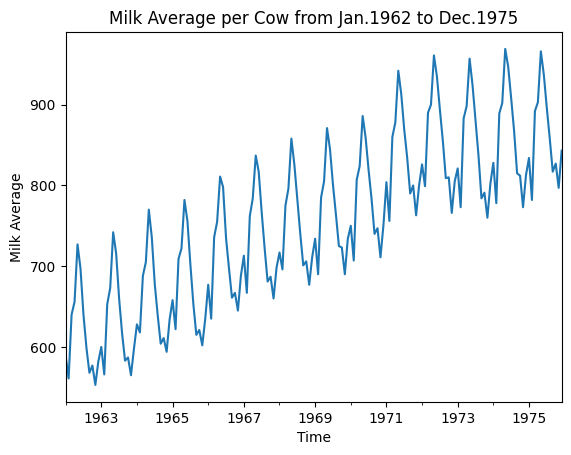

In [ ]:
#plotting the time series plot shown in Fig.
mts.plot()
plt.title('Milk Average per Cow from Jan.1962 to Dec.1975')
plt.xlabel('Time'); plt.ylabel('Milk Average'); plt.show()

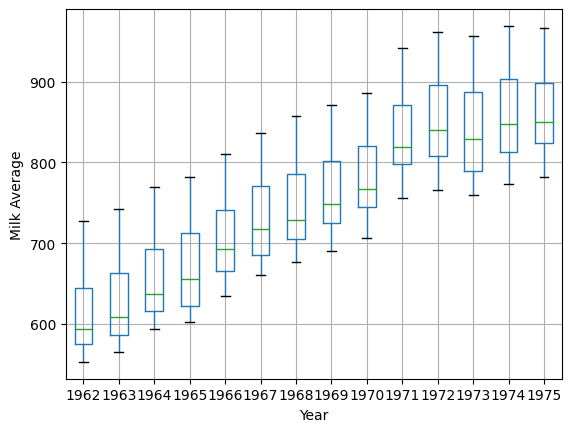

In [ ]:
#plotting the yearly boxplot shown in Fig.
my=np.array(mts).reshape(14,12)
myt=np.transpose(my)
year=[1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
1970, 1971,1972, 1973, 1974, 1975]
myt=pd.DataFrame(myt, columns=year)
bp=myt.boxplot()
plt.xlabel('Year'); plt.ylabel('Milk Average'); plt.show()

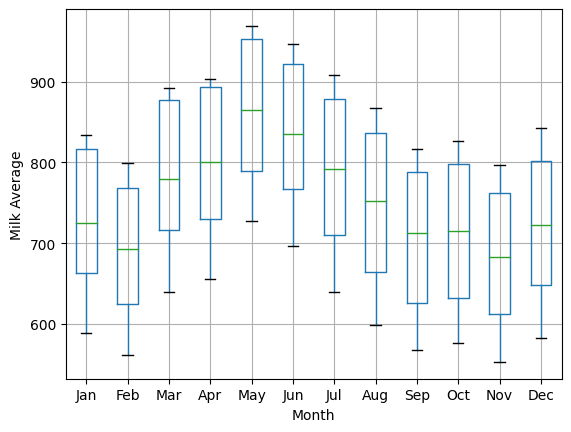

In [ ]:
#plotting the monthly boxplot shown in Fig. 1.20
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
'Aug', 'Sep', 'Oct', 'Nov','Dec']
myd=pd.DataFrame(my, columns=month)
bpm=myd.boxplot()
plt.xlabel('Month'); plt.ylabel('Milk Average'); plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url= 'http://s3.amazonaws.com/assets.datacamp.com/course/dasi/present.txt'
birth= pd.read_csv(url, sep=' ')
birth.to_csv('G:\\datasets\\Noboyngirl.csv')
#storing the data birth into the file Noboyngirl.csv
birth

,year,boys,girls
1,1940,1211684,1148715
2,1941,1289734,1223693
3,1942,1444365,1364631
4,1943,1508959,1427901
5,1944,1435301,1359499
...,...,...,...
59,1998,2016205,1925348
60,1999,2026854,1932563
61,2000,2076969,1981845
62,2001,2057922,1968011


In [ ]:
birth_year = birth.set_index('year')
# the column ’year’ of the data is used as index for the data
birth_year


,boys,girls
year,,
1940,1211684,1148715
1941,1289734,1223693
1942,1444365,1364631
1943,1508959,1427901
1944,1435301,1359499
...,...,...
1998,2016205,1925348
1999,2026854,1932563
2000,2076969,1981845


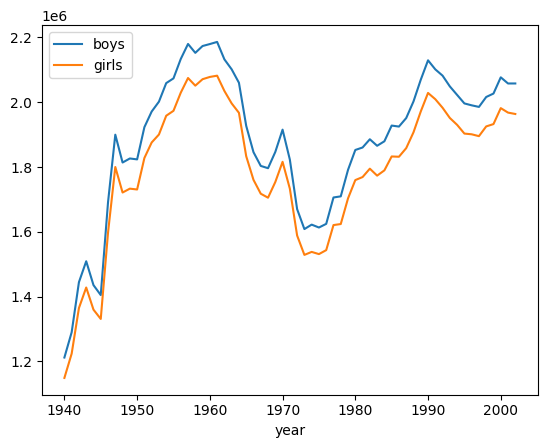

In [ ]:
#plotting the boy and girl time series plots
birth_year.plot(); plt.show()

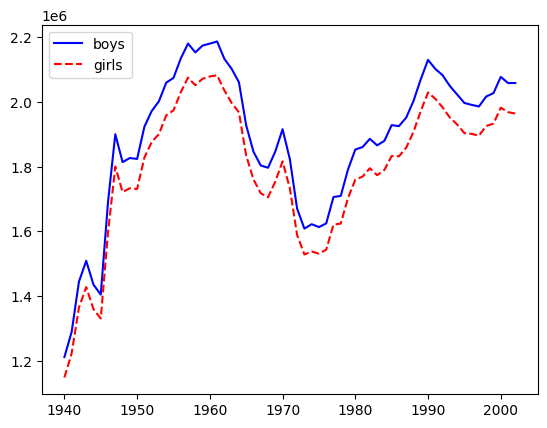

In [ ]:
# when printing in white and black, using different lines to
# distinguish the two time series plots shown in Fig.
boy,= plt.plot(birth_year['boys'],'b-', label='boys')
# ’b-’ means blue and solid line
girl,= plt.plot(birth_year['girls'],'r--',label='girls')
# ’r--’ means red and dashed line
plt.legend(handles=[boy, girl]); plt.show()
# plotting barcharts of the boy and girl series shown Fig

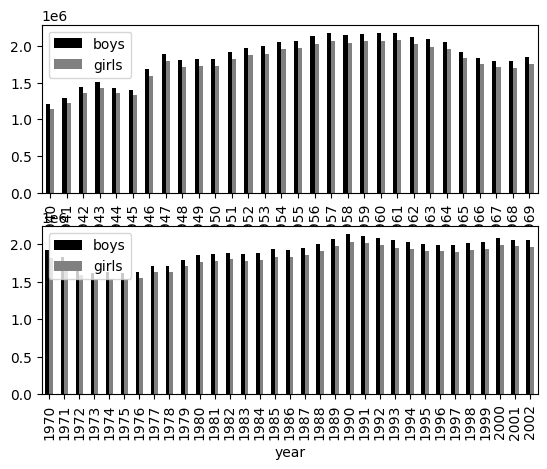

In [ ]:
fig = plt.figure()
birth_year[:30].plot(kind='bar', color=['black','grey'],
ax=fig.add_subplot(211))
birth_year[30:].plot(kind='bar', color=['black','grey'],
ax=fig.add_subplot(212))
plt.show()

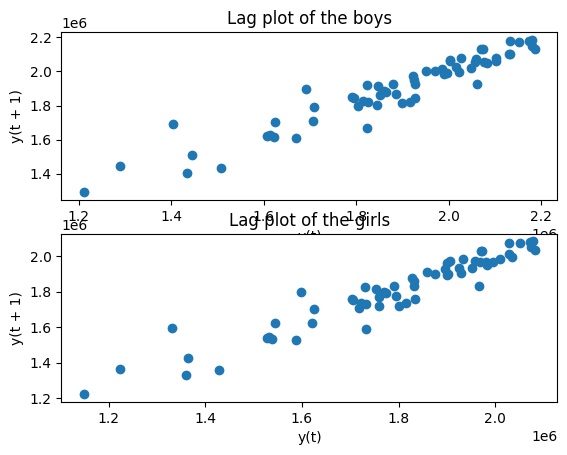

In [ ]:
# plotting the boy and girl lag plots shown Fig.
from pandas.plotting import lag_plot
# note the command "lag_plot" is not in the matplotlib
fig = plt.figure()
lag_plot(birth_year['boys'], ax=fig.add_subplot(211))
plt.title('Lag plot of the boys')
lag_plot(birth_year['girls'], ax=fig.add_subplot(212))
plt.title('Lag plot of the girls')
plt.show()

# We have also learned six
visualization methods: time series plot, histogram, correlogram (ACF plot), boxplot,bar chart, and lag plot. They all are very helpful for us to understand and analyze a time series.

**Exploratory Time Series Data Analysis**

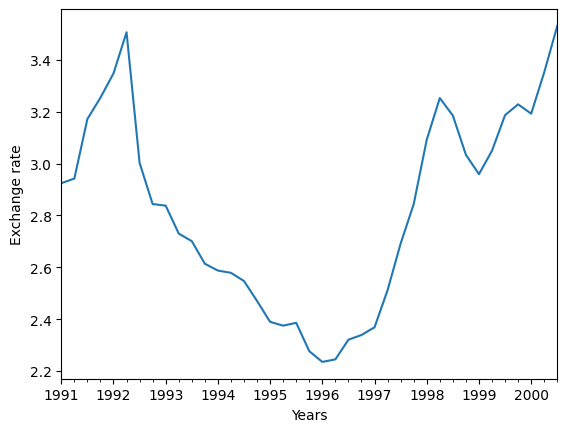

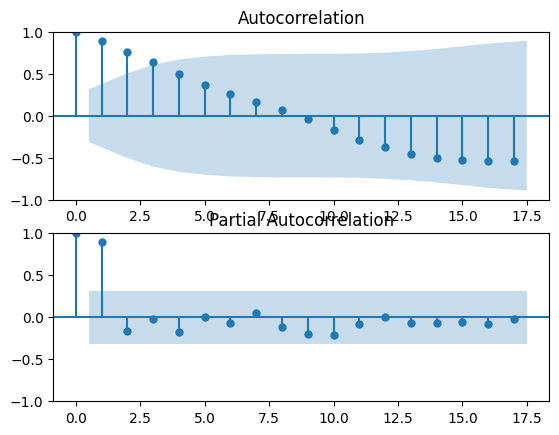

In [ ]:
#Partial Autocorrelation Functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
x=pd.read_csv(dtapath +'ExchRate NZ per UK.txt',header=0)
dates = pd.date_range('1991', periods=len(x), freq='Q')
x.index=dates; xts=pd.Series(x['xrate'])
xts.plot(); plt.xlabel('Years')
plt.ylabel('Exchange rate'); plt.show()
# The next is to plot ACF and PACF using statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure()
plot_acf(xts, lags=17, ax= fig.add_subplot(211))
plot_pacf(xts, lags=17, ax= fig.add_subplot(212))
plt.show()
# The next is to plot ACF and PACF using PythonTsa

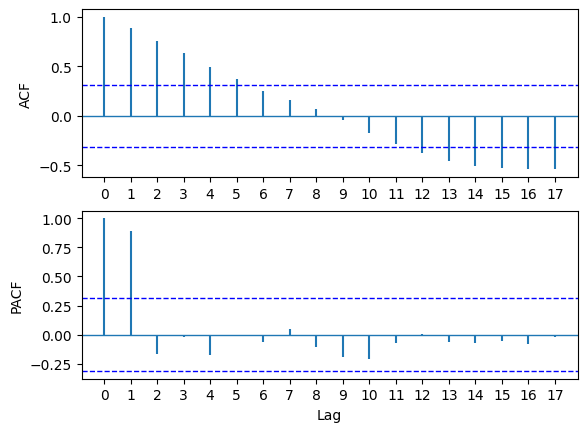

In [ ]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(xts, both=True, lag=17)
plt.show()

# White Noise Test

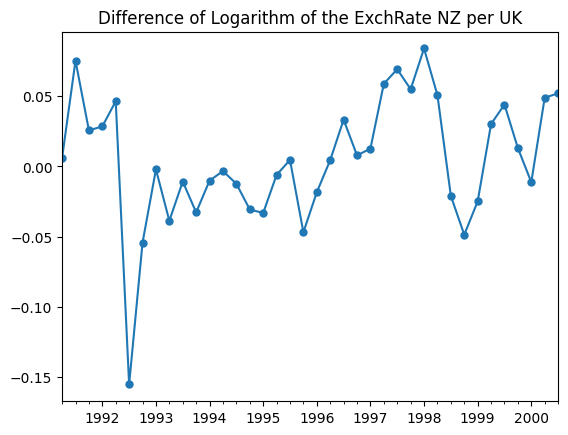

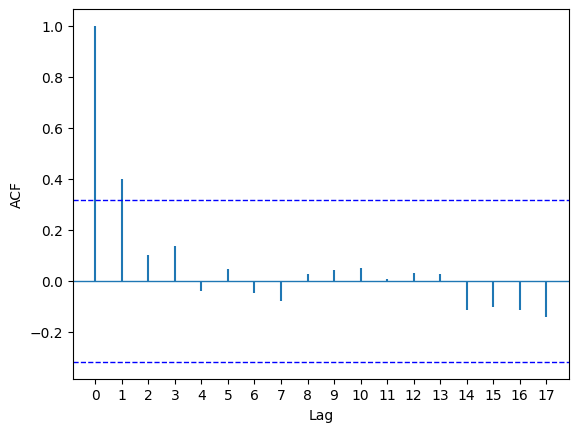

In [ ]:
logxts=np.log(xts)
dlogxts=logxts.diff(1)
dlogxts=dlogxts.dropna() #delete "NaN"
dlogxts.plot(marker='o', markersize=5)
plt.title('Difference of Logarithm of the ExchRate NZ per UK')
plt.show()
acf_pacf_fig(dlogxts, both=False, lag=17) #plot ACF only
plt.show()
from statsmodels.tsa.stattools import acf
r,q,p=acf(dlogxts,nlags=35,qstat=True)
# r for ACF; q for Ljung-Box statistics; p for p-values


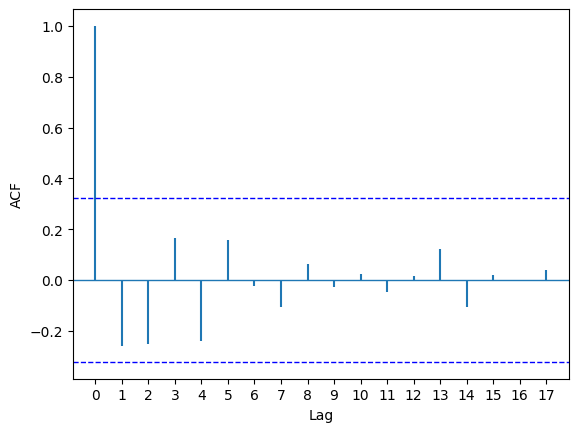

array([0.10279916, 0.07226889, 0.09256769, 0.06353298, 0.0743523 ,
       0.12230988, 0.1563488 , 0.21311281, 0.28660097, 0.36751679,
       0.44441684, 0.52889322, 0.53656066, 0.55838455, 0.63132226,
       0.70003144, 0.75306299, 0.80635176, 0.79263419, 0.82537154,
       0.84889291, 0.74786537, 0.79541059, 0.72526094, 0.72807138,
       0.76359134, 0.76365521, 0.67031202, 0.69953091, 0.6323352 ,
       0.55188113, 0.58532784, 0.632728  , 0.61512833, 0.59652958])

In [ ]:
p
from statsmodels.stats.diagnostic import acorr_ljungbox
q1,p1=acorr_ljungbox(dlogxts,lags=35,return_df=False,boxpierce=False)
p1
ddlogxts=dlogxts.diff(1) # difference again
ddlogxts=ddlogxts.dropna()
acf_pacf_fig(ddlogxts, both=False, lag=17)
plt.show()
r2,q2,p2=acf(ddlogxts,nlags=35,qstat=True)
p2

#STOCK ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
x=pd.read_table(dtapath +'monthly returns of Procter n Gamble stock n 3 market indexes 1961 to 2016.csv', sep=',', header=0)
x.head()

,RET,vwretd,ewretd,sprtrn
0,0.042987,0.063952,0.082048,0.063156
1,0.054386,0.037005,0.060130,0.026870
2,0.054908,0.030610,0.049888,0.025536
3,0.034385,0.005645,0.009487,0.003843
4,-0.035222,0.025894,0.041572,0.019139


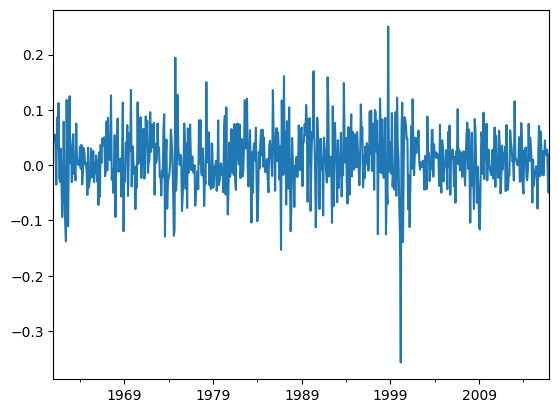

In [ ]:
timeindex= pd.date_range('1961', periods=len(x), freq='M')
x.index=timeindex
yts=x['RET']
import matplotlib.pyplot as plt
yts.plot(); plt.show()

In [ ]:
yts.describe()

,RET
count,672.000000
mean,0.010342
std,0.055383
min,-0.357041
25%,-0.021283
50%,0.007384
75%,0.044261
max,0.250931


In [ ]:
pd.Series.idxmax(yts) # get the position of the maximumTimestamp(’1998-10-31 00:00:00’, freq=’M’)

Timestamp('1998-10-31 00:00:00')

In [ ]:
pd.Series.idxmin(yts) # get the position of the minimumTimestamp(’2000-03-31 00:00:00’, freq=’M’)

Timestamp('2000-03-31 00:00:00')

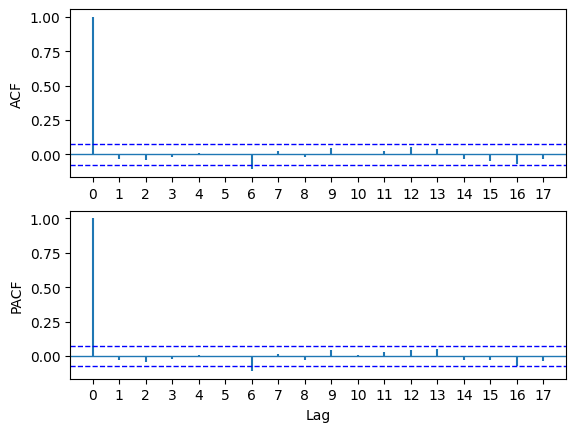

In [ ]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(yts, both=True, lag=17)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
r,q,p=acf(yts,qstat=True)
p

array([0.41254176, 0.38900645, 0.54029397, 0.69709275, 0.81666593,
       0.11107219, 0.15000765, 0.20494966, 0.1976198 , 0.26606154,
       0.30642527, 0.25597948, 0.26708488, 0.29372717, 0.27787471,
       0.1902881 , 0.20381855, 0.24892409, 0.28338075, 0.24395794,
       0.28959633, 0.34303995, 0.39824014, 0.43363919, 0.44730827,
       0.43146344, 0.48622793, 0.49357712])

# Simple Time Series Compositions

In [ ]:
#deterministic trend component
#deterministic seasonality
#random (stochastic) variation component

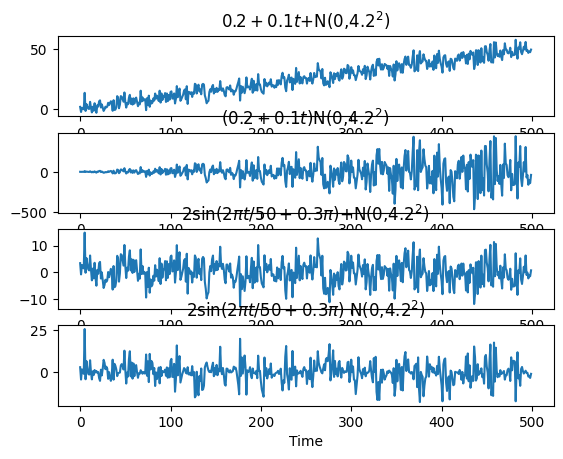

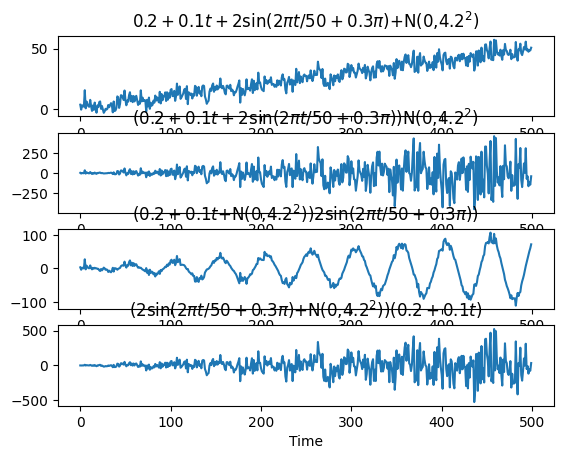

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
t=np.arange(500)
f_t=0.2+0.1*t
f_t=pd.Series(f_t)
p_t=2*np.sin(2*np.pi*t/50 +0.3*np.pi)
p_t=pd.Series(p_t)
np.random.seed(1357)
x_n=np.random.normal(loc=0, scale=4.2, size=500)
x_n=pd.Series(x_n)
fx_n=f_t+x_n; fx=f_t*x_n
px_n=p_t+x_n; px=p_t*x_n
fig = plt.figure()
fx_n.plot(ax= fig.add_subplot(411))
plt.title('$0.2+0.1t$+N(0,$4.2^2$)')
fx.plot(ax= fig.add_subplot(412))
plt.title('($0.2+0.1t$)N(0,$4.2^2$)')
px_n.plot(ax= fig.add_subplot(413))
plt.title('$ 2\sin(2\pi t/50+0.3\pi)$+N(0,$4.2^2$)')
px.plot(ax= fig.add_subplot(414))
plt.title('$ 2\sin(2\pi t/50 +0.3\pi)$ N(0,$4.2^2$)')
plt.xlabel('Time'); plt.show()
fApAx=f_t+p_t+x_n
fAp_x=(f_t+p_t)*x_n
fAx_p=(f_t+x_n)*p_t
pAx_f=(p_t+x_n)*f_t
fig = plt.figure()
fApAx.plot(ax= fig.add_subplot(411))
plt.title('$0.2+0.1t+2\sin(2\pi t/50 +0.3\pi)$+N(0,$4.2^2$)')
fAp_x.plot(ax= fig.add_subplot(412))
plt.title('($0.2+0.1t+2\sin(2\pi t/50+0.3\pi)$)N(0,$4.2^2$)')
fAx_p.plot(ax= fig.add_subplot(413))
plt.title('($0.2+0.1t$+N(0,$4.2^2$))$2\sin(2\pi t/50+0.3\pi)$)')
pAx_f.plot(ax= fig.add_subplot(414))
plt.title('($2\sin(2\pi t/50+0.3\pi)$+N(0,$4.2^2$))($0.2+0.1t$)')
plt.xlabel('Time'); plt.show()


#Time Series Decomposition and Smoothing
#Decomposing a time series
#is helpful to better understand it and improve forecast accuracy.

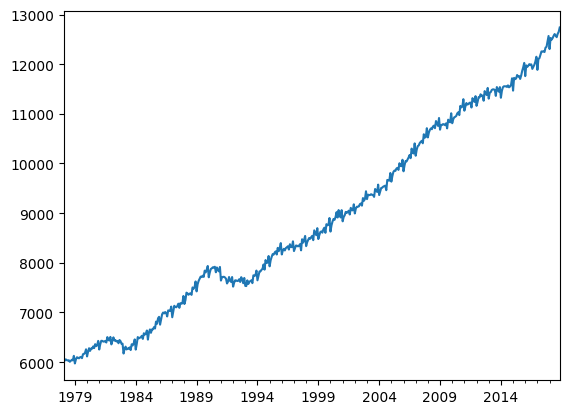

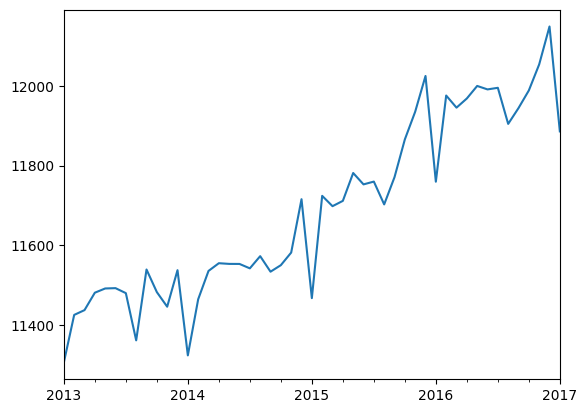

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
aul=pd.read_excel(dtapath +
'AustraliaEmployedTotalPersons.xlsx', header=0)
timeindex= pd.date_range('1978-02',periods=len(aul),freq='M')
aul.index=timeindex
aults=aul['EmployedP']
aults.plot(); plt.show()
# Graph time series plot from 2013.1 to 2017.1
aults['2013-01':'2017-01'].plot(); plt.show()




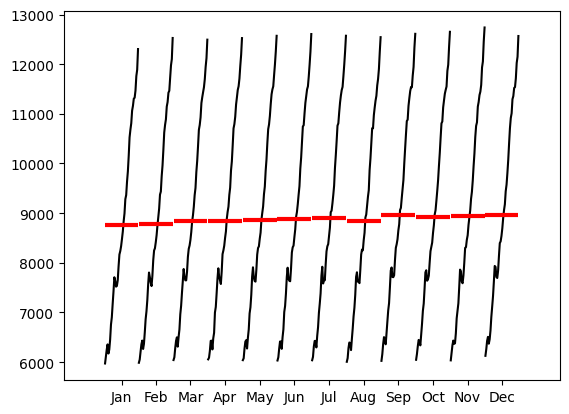

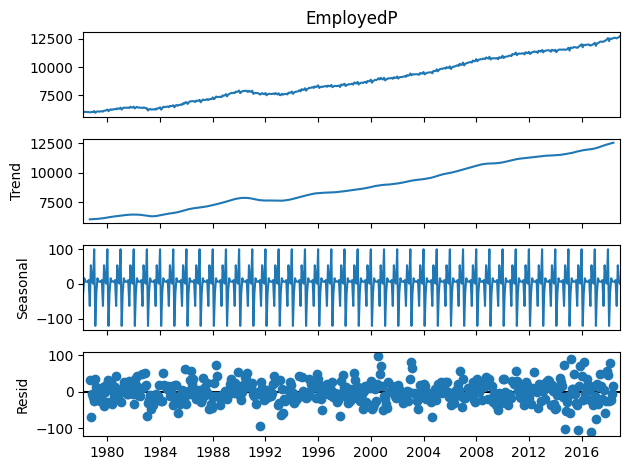

In [ ]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(aults); plt.show() #Plot seasonal plots
from statsmodels.tsa.seasonal import seasonal_decompose
aultsdeca=seasonal_decompose(aults, model='additive')
aultsdeca.plot(); plt.show()

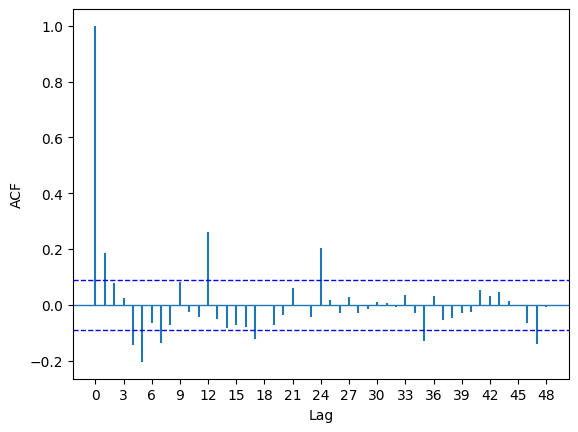

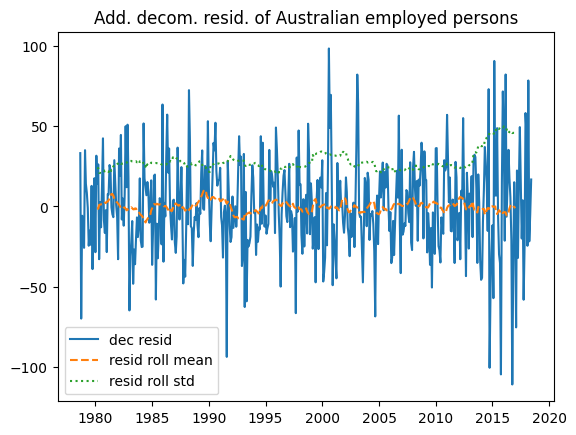

In [ ]:
aultsdecaResid=aultsdeca.resid.dropna()
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(aultsdecaResid, both=False, lag=48)
plt.show()
ar=aultsdecaResid
rolm=pd.Series.rolling(ar, window=36, center=True).mean()
rolstd=pd.Series.rolling(ar, window=36, center=True).std()
plt.plot(aultsdecaResid, label='dec resid')
plt.plot( rolm, label='resid roll mean', linestyle='--' )
plt.plot(rolstd, label='resid roll std', linestyle=':')
plt.title('Add. decom. resid. of Australian employed persons')
plt.legend(); plt.show()


# Chinese quarterly
#GDP from 1992 to 2017 has both an increasing trend and seasonality

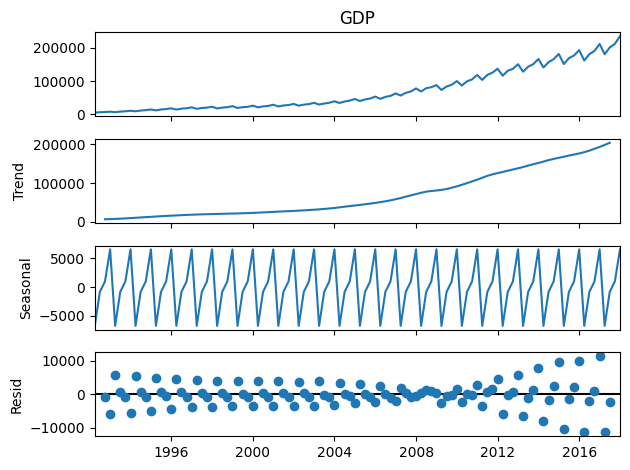

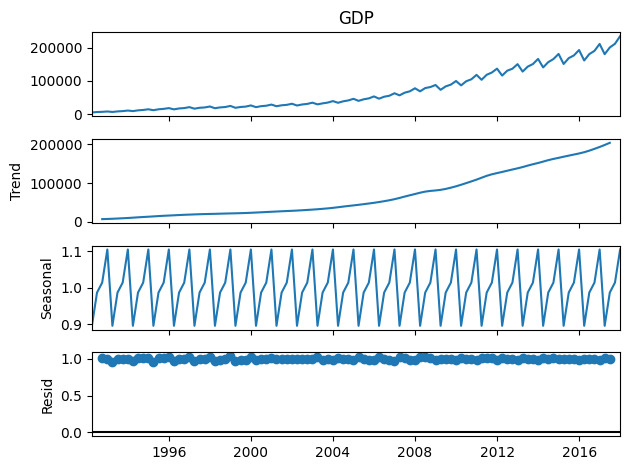

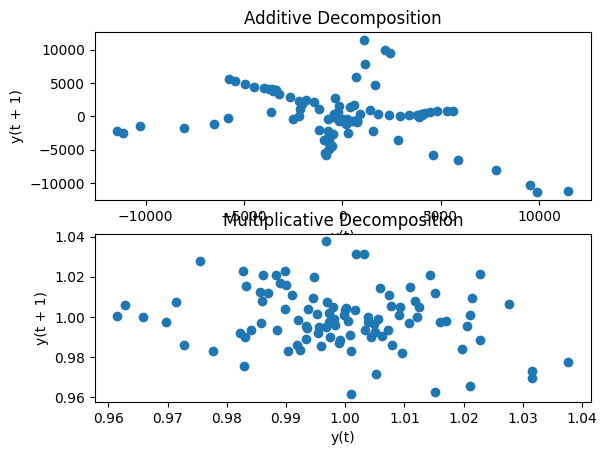

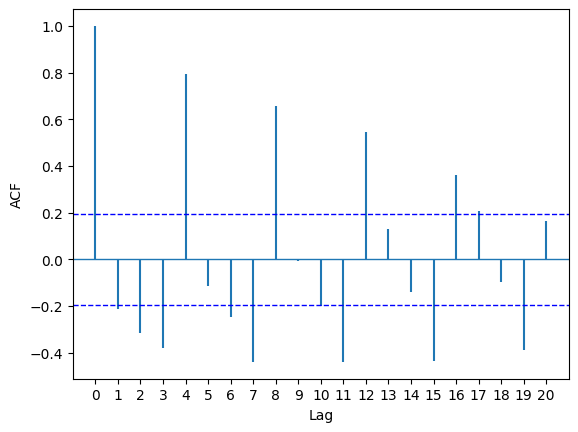

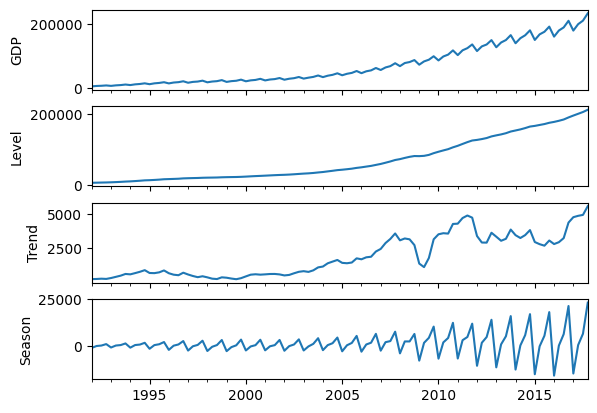

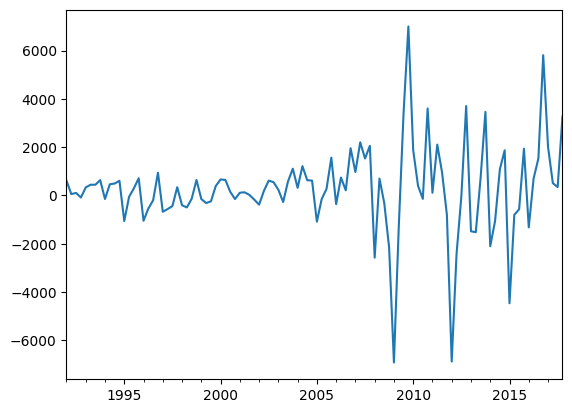

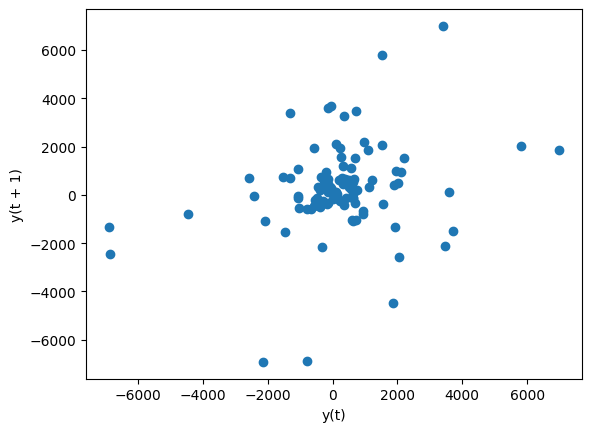

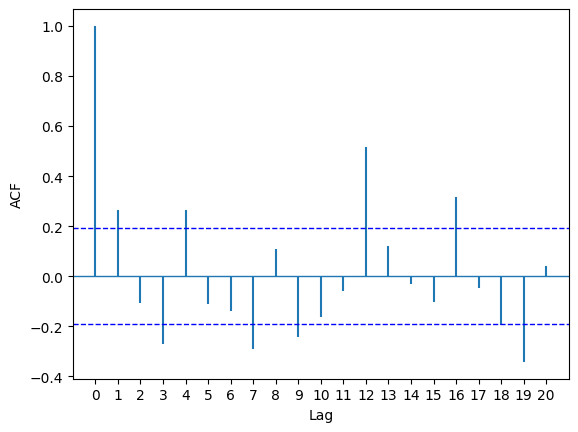

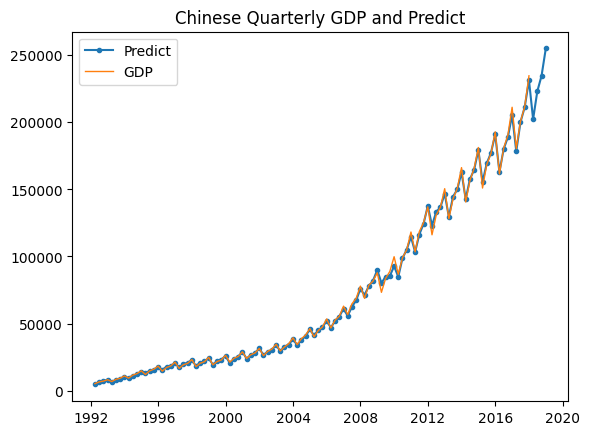

array([6.34810141e-03, 1.31536279e-02, 7.91687363e-04, 6.40166814e-05,
       9.48342001e-05, 9.40459314e-05, 3.58208439e-06, 5.00227678e-06,
       6.73235318e-07, 4.45330394e-07, 8.78031793e-07, 2.75891184e-12,
       3.39474192e-12, 8.36829299e-12, 1.20118228e-11, 1.43144533e-13,
       3.21469807e-13, 1.00779051e-13, 3.96828032e-16, 9.21884288e-16])

In [ ]:
import pandas as pd
import numpy as np
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
x=pd.read_csv(dtapath +
'gdpquarterlychina1992.1-2017.4.csv',header=0)
dates = pd.date_range(start='1992',periods=len(x),freq='Q')
x.index=dates
x=pd.Series(x['GDP'])
from statsmodels.tsa.seasonal import seasonal_decompose
xdeca=seasonal_decompose(x, model='additive')
xdecm=seasonal_decompose(x, model='multiplicative')
import matplotlib.pyplot as plt
xdeca.plot(); plt.show()
xdecm.plot(); plt.show()
from pandas.plotting import lag_plot
fig = plt.figure()
lag_plot(xdeca.resid, ax=fig.add_subplot(211))
plt.title('Additive Decomposition')
lag_plot(xdecm.resid, ax=fig.add_subplot(212))
plt.title('Multiplicative Decomposition')
plt.show()
xdecmResid=xdecm.resid
xdecmResid=xdecmResid.dropna()
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(xdecmResid, both=False, lag=20)
plt.show()
from statsmodels.tsa.holtwinters import ExponentialSmoothing
xhwfit=ExponentialSmoothing(x,trend='add',seasonal='add',
seasonal_periods=4).fit(method='L-BFGS-B')
ax1=plt.subplot(411);x.plot();plt.setp(ax1.get_xticklabels(),
visible=False); plt.ylabel('GDP')
ax2=plt.subplot(412,sharex=ax1);xhwfit.level.plot();plt.setp(ax2.get_xticklabels(),visible=False); plt.ylabel('Level')
ax3=plt.subplot(413,sharex=ax1);xhwfit.trend.plot();plt.setp(ax3.get_xticklabels(),visible=False); plt.ylabel('Trend')
# now "slope" is removed, use "trend" instead.
ax4=plt.subplot(414, sharex=ax1); xhwfit.season.plot();
plt.ylabel('Season')
plt.show()
xhwfit.resid.plot(); plt.show()
lag_plot( xhwfit.resid); plt.show()
acf_pacf_fig(xhwfit.resid, both=False, lag=20)
plt.show()
y=xhwfit.forecast(4) #out-of-sample forecasting
y
z=xhwfit.predict(start='1992-03-31',end='2018-12-31')
#In-sample prediction and out-of-sample forecasting
z=pd.DataFrame(z,columns=['Predict'])
zx=z.join(x)
Predict,=plt.plot(zx['Predict'],marker='.',label='Predict')
GDP,=plt.plot(zx['GDP'], linewidth=1.0, label='GDP')
plt.title('Chinese Quarterly GDP and Predict')
plt.legend(handles=[Predict, GDP]); plt.show()
from statsmodels.tsa.stattools import acf
r,q,p=acf(xhwfit.resid,qstat=True, nlags=20)
p

In [ ]:
z=xhwfit.predict(start='1992-03-31',end='2023-12-31')
#In-sample prediction and out-of-sample forecasting
z

,0
1992-03-31,4620.611660
1992-06-30,6479.023723
1992-09-30,7018.358844
1992-12-31,8259.573046
1993-03-31,6470.741213
...,...
2022-12-31,343785.324652
2023-03-31,313319.233345
2023-06-30,334064.362522
2023-09-30,345646.155857


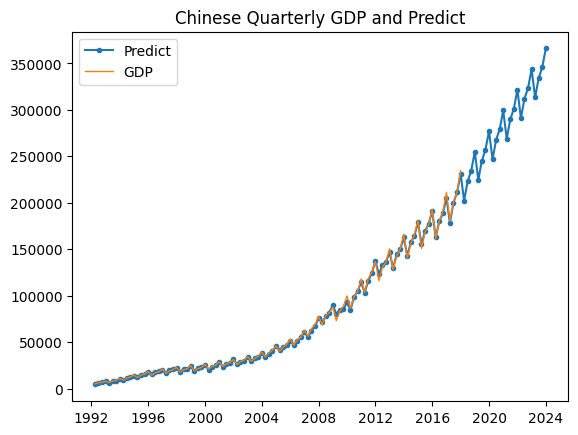

array([6.34810141e-03, 1.31536279e-02, 7.91687363e-04, 6.40166814e-05,
       9.48342001e-05, 9.40459314e-05, 3.58208439e-06, 5.00227678e-06,
       6.73235318e-07, 4.45330394e-07, 8.78031793e-07, 2.75891184e-12,
       3.39474192e-12, 8.36829299e-12, 1.20118228e-11, 1.43144533e-13,
       3.21469807e-13, 1.00779051e-13, 3.96828032e-16, 9.21884288e-16])

In [ ]:
z=pd.DataFrame(z,columns=['Predict'])
zx=z.join(x)
Predict,=plt.plot(zx['Predict'],marker='.',label='Predict')
GDP,=plt.plot(zx['GDP'], linewidth=1.0, label='GDP')
plt.title('Chinese Quarterly GDP and Predict')
plt.legend(handles=[Predict, GDP]); plt.show()
from statsmodels.tsa.stattools import acf
r,q,p=acf(xhwfit.resid,qstat=True, nlags=20)
p

#Stationary Time Series Models

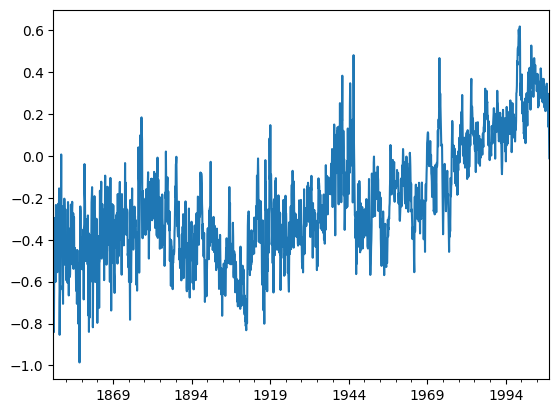

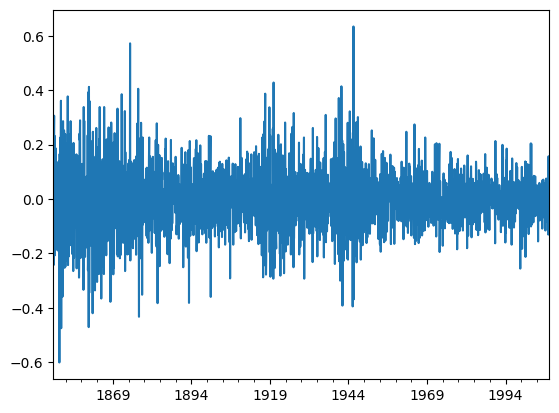

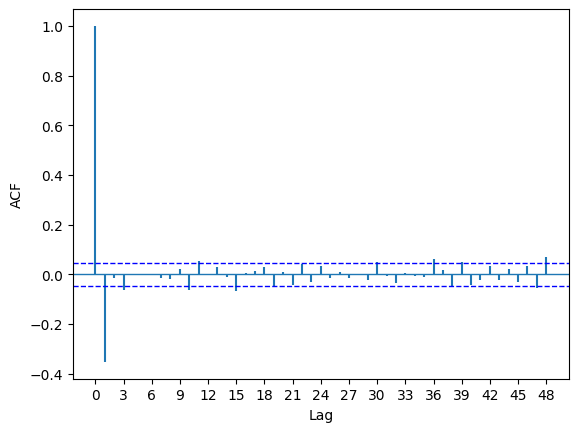

<ipython-input-4-514d24cac23f>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(dt,regression='c', nlags='auto')


(0.02619117528270737,
 0.1,
 56,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
import numpy as np
import pandas as pd
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
tem=pd.read_csv(dtapath +'Southtemperature.txt',
 header=None,sep='\s+')
# now read_table is deprecated, use read_csv instead.
temts=pd.concat([tem.loc[0],tem.loc[1]],ignore_index='true')
for i in range(2,158):
 temts=pd.concat([temts,tem.loc[i]],ignore_index='true')
type(temts)

dates = pd.date_range('1850', periods= len(temts), freq='M')
temts.index=dates
import matplotlib.pyplot as plt
temts.plot(); plt.show()
dt=temts.diff(1) # the first differencing
dt=dt.dropna()
dt.plot(); plt.show()
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(dt, both=False, lag=48)
plt.show()
from statsmodels.tsa.stattools import kpss
kpss(dt,regression='c', nlags='auto')



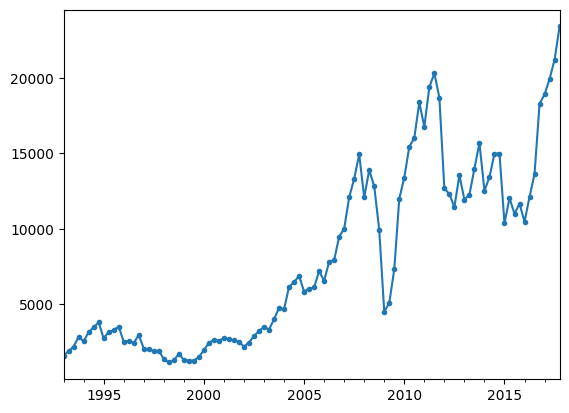

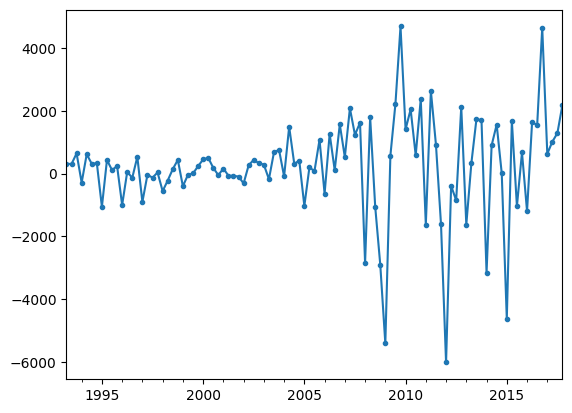

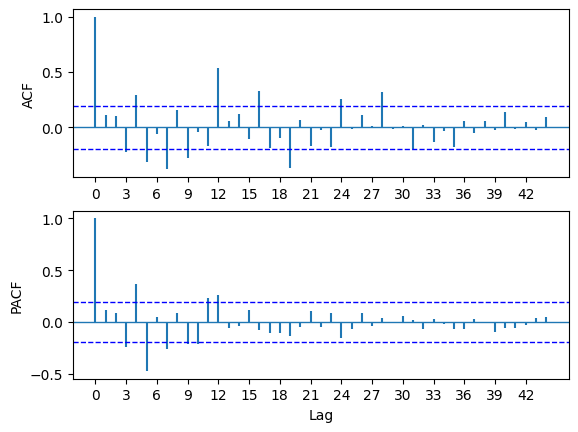

<ipython-input-5-a4a1ac6b9506>:21: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(d1dx, regression='c', nlags='auto')


(0.10664288385692093,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
import pandas as pd
import numpy as np
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
x=pd.read_csv(dtapath +
 'gdpquarterlychina1992.1-2017.4.csv',header=0)
dates = pd.date_range(start='1992',periods=len(x),freq='Q')
x.index=dates; x=pd.Series(x['GDP'])
dx=x.diff(4) # seasonal differencing
dx=dx.dropna()
import matplotlib.pyplot as plt
dx.plot(marker='o',ms=3) # ms means marker size
plt.show()
d1dx=dx.diff(1)
d1dx=d1dx.dropna()
d1dx.plot(marker='o',ms=3); plt.show()
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(d1dx, both=True, lag=44)
plt.show()
from statsmodels.tsa.stattools import kpss
kpss(d1dx, regression='c', nlags='auto')



# Monthly Anti-Diabetic Drug Sales in Australia

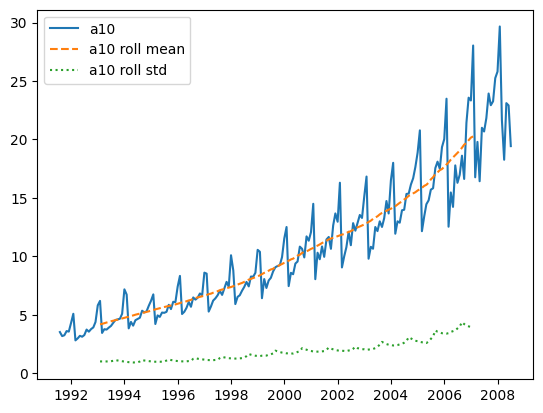

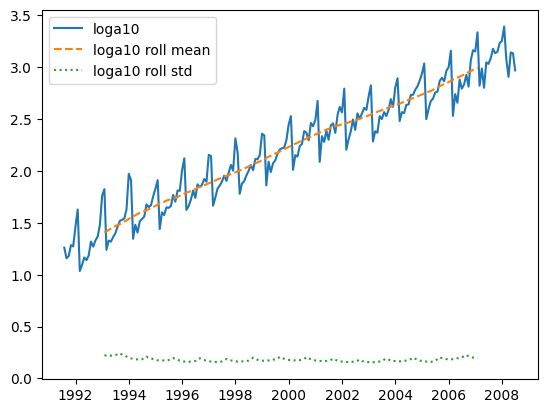

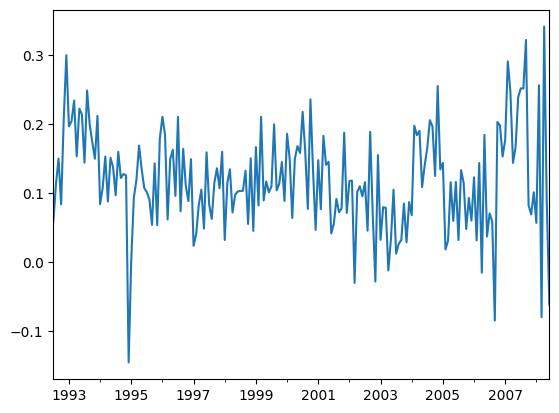

<ipython-input-7-723e6cc4affb>:30: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(dloga10, regression='c', nlags='auto')


(0.16342061846322026,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
import pandas as pd
import numpy as np
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
a10=pd.read_csv(dtapath +'AntidiabeticDrugSales.csv',header=None)
dates=pd.date_range(start='1991-07',periods=len(a10),freq='M')
a10.index=dates; a10=pd.Series(a10[0])
import matplotlib.pyplot as plt
rolma10=pd.Series.rolling(a10, window=36, center=True).mean()
rolstda10=pd.Series.rolling(a10, window=36, center=True).std()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
 # explicitly register matplotlib converters.
import matplotlib.pyplot as plt
plt.plot(a10, label='a10')
plt.plot(rolma10, label='a10 roll mean', linestyle='--')
plt.plot(rolstda10, label='a10 roll std', linestyle=':')
plt.legend(); plt.show()
loga10=np.log(a10)
rolmloga10=pd.Series.rolling(loga10,window=36,center=True).mean()
rolstdloga10=pd.Series.rolling(loga10,window=36,center=True).std()
plt.plot(loga10, label='loga10')
plt.plot(rolmloga10, label='loga10 roll mean', linestyle='--')
plt.plot(rolstdloga10, label='loga10 roll std', linestyle=':')
plt.legend(); plt.show()
dloga10=loga10.diff(12)
dloga10=dloga10.dropna()
dloga10.plot(); plt.show()
from statsmodels.tsa.stattools import kpss
kpss(dloga10, regression='c', nlags='auto')

# Moving Average Models

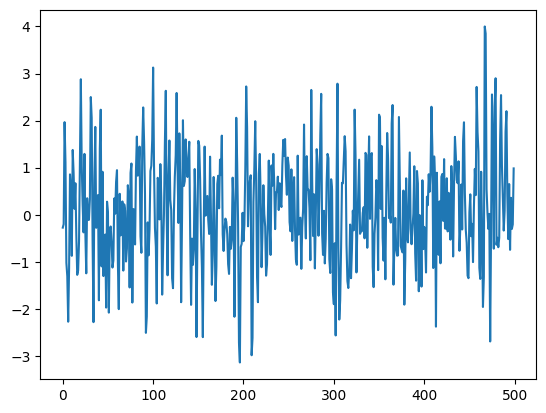

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
ma=np.array([1,0.6,-0.3])
np.random.seed(123457)
x= arma_generate_sample(ar=[1],ma=ma,nsample=500)
 # ar=[1]meansno ar partinthe model
type(x)
x=pd.Series(x)
type(x)
import matplotlib.pyplot as plt
x.plot();plt.show()

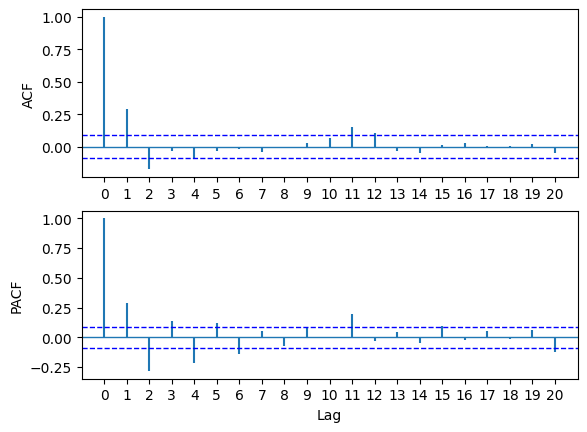

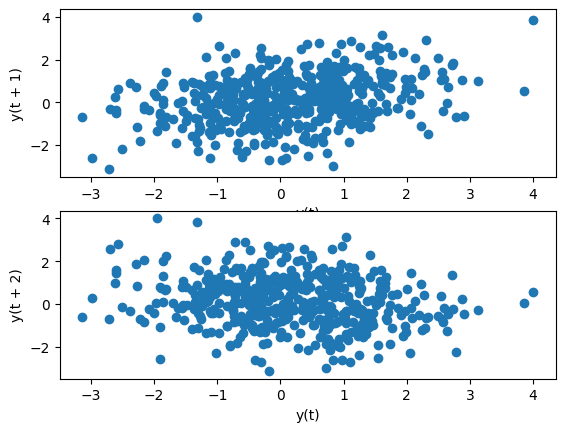

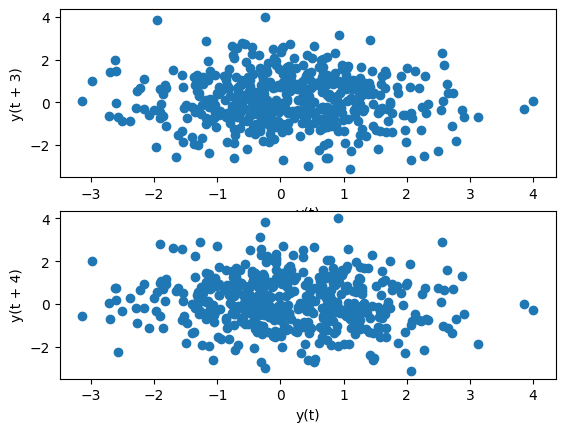

In [ ]:
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(x,both=True,lag=20)
plt.show()
from pandas.plotting import lag_plot
fig =plt.figure()
lag_plot(x,lag=1,ax=fig.add_subplot(211))
lag_plot(x,lag=2,ax=fig.add_subplot(212))
plt.show()
fig =plt.figure()
lag_plot(x,lag=3,ax=fig.add_subplot(211))
lag_plot(x,lag=4,ax=fig.add_subplot(212))
plt.show()


# Properties of MA Models

In [ ]:
import numpy as np
p1=[2, 1,-1, 0.6,-2, 1]
r1=np.roots(p1)
r1

array([-1.44125189+0.j        , -0.15868646+0.9059506j ,
       -0.15868646-0.9059506j ,  0.6293124 +0.11862764j,
        0.6293124 -0.11862764j])

In [ ]:
abs(r1)

array([1.44125189, 0.91974337, 0.91974337, 0.64039567, 0.64039567])

In [ ]:
p2=[0.2, 0.1,-0.1, 0.6,-0.2, 1] # MA model (b)
p2

[0.2, 0.1, -0.1, 0.6, -0.2, 1]

In [ ]:
r2=np.roots(p2)
r2

array([-1.97706234+0.j        ,  0.9495042 +0.98246025j,
        0.9495042 -0.98246025j, -0.21097303+1.14465167j,
       -0.21097303-1.14465167j])

In [ ]:
abs(r2)

array([1.97706234, 1.36630391, 1.36630391, 1.16393173, 1.16393173])

In [ ]:
from statsmodels.tsa.arima_process import arma2ar
arma2ar(ar=[1], ma=[1,-2/3, 4/9], lags=16)

array([ 1.        ,  0.66666667,  0.        , -0.2962963 , -0.19753086,
        0.        ,  0.0877915 ,  0.05852766,  0.        , -0.02601229,
       -0.01734153,  0.        ,  0.00770735,  0.00513823,  0.        ,
       -0.00228366])

In [ ]:
 # ar=[1] means no ar part in the model

#Autoregressive Models

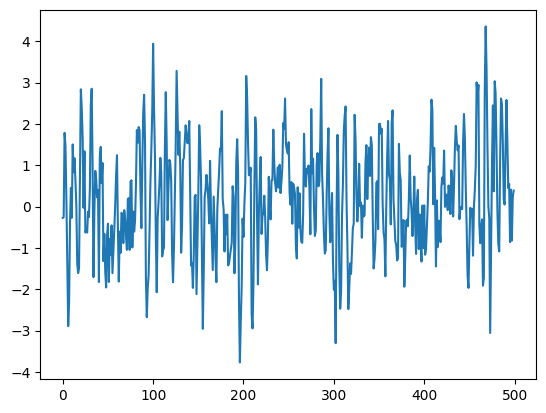

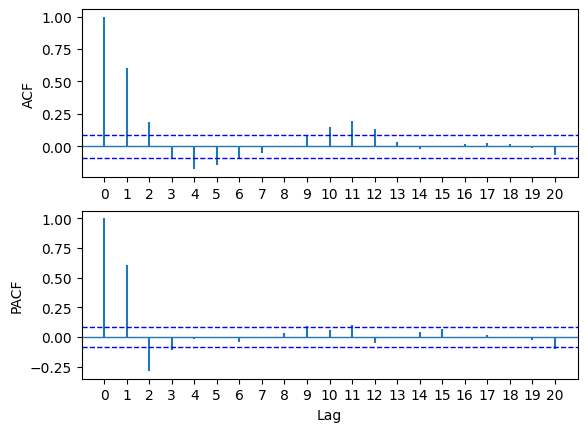

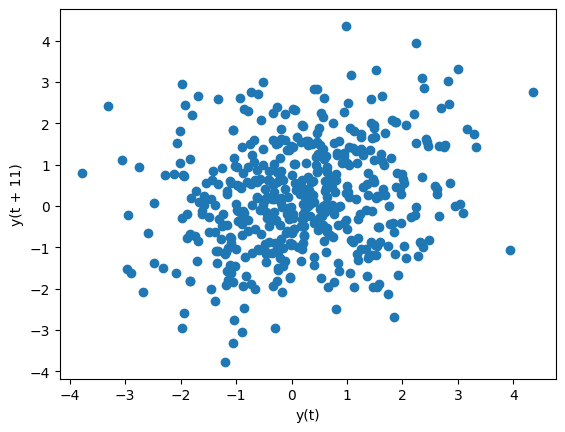

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
ar=np.array([1,-0.8, 0.3])
np.random.seed(123457)
x= arma_generate_sample(ar=ar, ma=[1], nsample=500)
 # ma=[1] means no ma part in the model
x=pd.Series(x)
import matplotlib.pyplot as plt
x.plot(); plt.show()
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(x, both=True, lag=20)
plt.show()
from pandas.plotting import lag_plot
lag_plot(x, lag=11);plt.show()


#Durbin-Levinson Recursion Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
p1=[-0.2,-0.1, 0.1,-0.6,-0.2, 1] # AR model (i)
r1=np.roots(p1)
r1


array([-1.38071518+0.42051849j, -1.38071518-0.42051849j,
        0.63071518+1.41504072j,  0.63071518-1.41504072j,
        1.        +0.j        ])

In [ ]:
abs(r1)

array([1.44333302, 1.44333302, 1.54923912, 1.54923912, 1.        ])

In [ ]:
p2=[-0.2,-0.1, 0.1, 0.6,-0.2, 1]
 # AR model (ii)
r2=np.roots(p2)
r2

array([-1.27880602+1.13255338j, -1.27880602-1.13255338j,
        1.5769574 +0.j        ,  0.24032732+1.01430874j,
        0.24032732-1.01430874j])

In [ ]:
abs(r2)

array([1.70822188, 1.70822188, 1.5769574 , 1.04239121, 1.04239121])

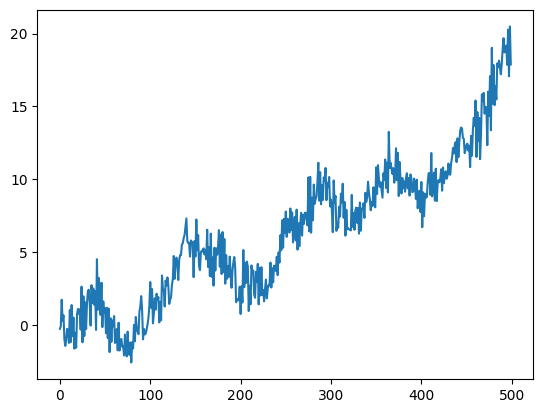

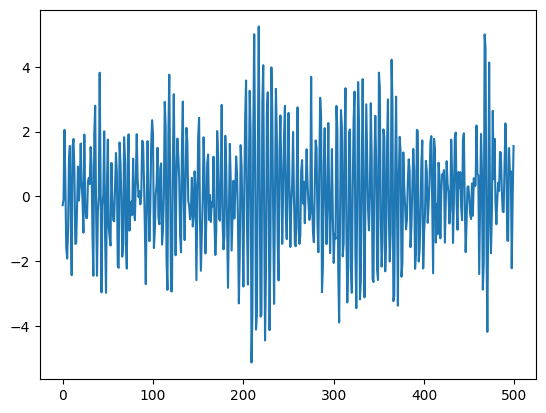

In [ ]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar1=np.array([1,-0.2,-0.6, 0.1,-0.1,-0.2])
np.random.seed(123457)
x1= arma_generate_sample(ar=ar1, ma=[1], nsample=500)
x1=pd.Series(x1)
x1.plot(); plt.show()
ar2=np.array([1,-0.2, 0.6, 0.1,-0.1,-0.2])
np.random.seed(123457)
x2= arma_generate_sample(ar=ar2, ma=[1], nsample=500)
x2=pd.Series(x2)
x2.plot(); plt.show()

In [ ]:
from statsmodels.tsa.arima_process import arma2ma
arma2ma(ar=[1,-0.8, 0.3], ma=[1], lags=15)

array([ 1.00000000e+00,  8.00000000e-01,  3.40000000e-01,  3.20000000e-02,
       -7.64000000e-02, -7.07200000e-02, -3.36560000e-02, -5.70880000e-03,
        5.52976000e-03,  6.13644800e-03,  3.25023040e-03,  7.59249920e-04,
       -3.67669184e-04, -5.21910323e-04, -3.07227503e-04])

#Autoregressive Moving Average Models

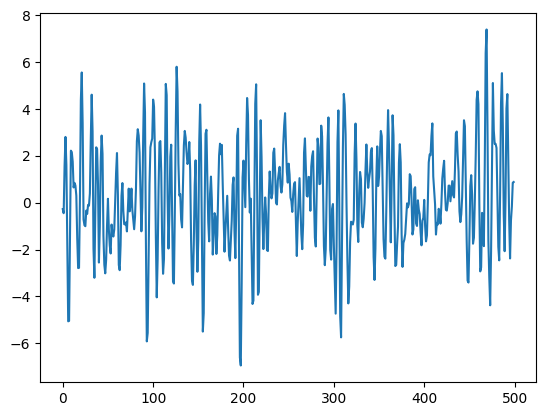

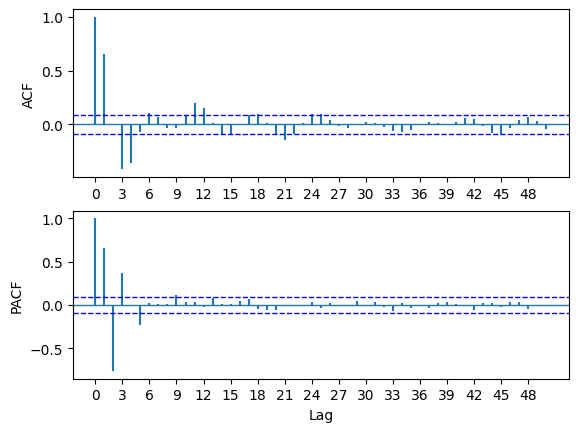

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
ar=np.array([1,-0.8, 0.6])
ma=np.array([1, 0.7, 0.4])
np.random.seed(123457)
x= arma_generate_sample(ar=ar, ma=ma, nsample=500)
x=pd.Series(x)
x.plot(); plt.show()
from PythonTsa.plot_acf_pacf import acf_pacf_fig
acf_pacf_fig(x, both=True, lag=50)
plt.show()


# Properties of ARMA Models

In [ ]:
from statsmodels.tsa.arima_process import arma2ma
arma2ma(ar=[1,-0.8, 0.6], ma=[1, 0.7, 0.4], lags=9)

array([ 1.      ,  1.5     ,  1.      , -0.1     , -0.68    , -0.484   ,
        0.0208  ,  0.30704 ,  0.233152])

In [ ]:
from statsmodels.tsa.arima_process import arma2ar
arma2ar(ar=[1,-0.8, 0.6], ma=[1, 0.7, 0.4], lags=9)

array([ 1.        , -1.5       ,  1.25      , -0.275     , -0.3075    ,
        0.32525   , -0.104675  , -0.0568275 ,  0.08164925])

In [ ]:
import numpy as np
import statsmodels.api as sm
map=[0.9,-0.8, 0.4, 1] # MA polynomial for model (a)
maroot=np.roots(map)
maroot

array([ 0.79781717+0.96728461j,  0.79781717-0.96728461j,
       -0.70674545+0.j        ])

In [ ]:
ar=[1,-0.2,-0.6, 0.1,-0.3] # coefficients of AR polynomial
ma=[1, 0.4,-0.8, 0.9]
arma_process = sm.tsa.ArmaProcess(ar, ma)
arma_process.isstationary # check stationarity
 # wrong! We will report this to the developer.
arma_process.isinvertible
 # check invertibility
from PythonTsa.CheckStationarynInvertible import isstationary, isinvertible
isstationary(arma_process)
isinvertible(arma_process)

False

#  Nowwediscuss the behavior of the true (theoretical) ACF and PACF of ARMA models.

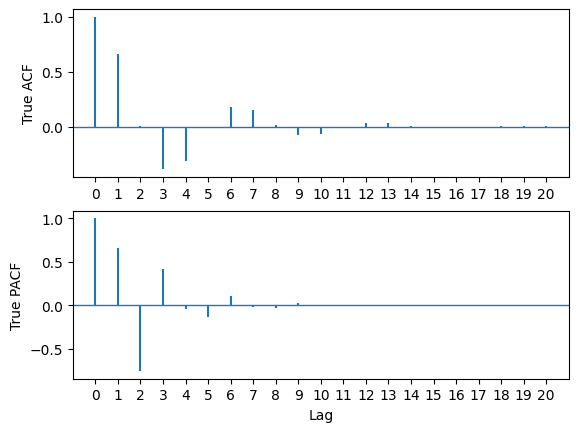

In [ ]:
import matplotlib.pyplot as plt
ar=[1,-0.8, 0.6]
ma=[1, 0.7, 0.4]
from PythonTsa.True_acf import Tacf_pacf_fig
Tacf_pacf_fig(ar,ma, both=True, lag=20)
plt.show()

#ARMA and ARIMA Modeling and Forecasting

In [ ]:
 plot_LB_pvalue(x,noestimatedcoef,nolags)

NameError: name 'plot_LB_pvalue' is not defined

In [ ]:
plot_ResidDiag(x,noestimatedcoef,nolags,lag)

#  Forecasting

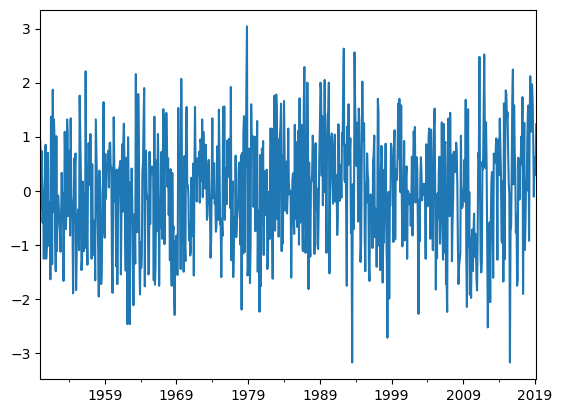

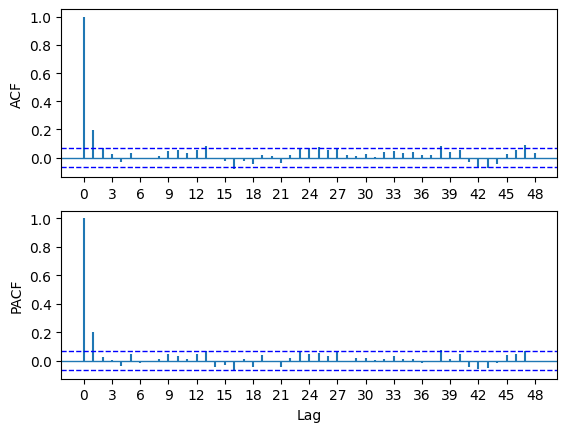

(0.3561836394749188,
 0.09604153470908672,
 50,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from statsmodels.tsa.arima_model import ARMA
 # for statsmodels 0.13.0 and later, see the last code below
from PythonTsa.LjungBoxtest import plot_LB_pvalue
from PythonTsa.datadir import getdtapath
dtapath=getdtapath()
nao=pd.read_csv(dtapath +'nao.csv', header=0)
timeindex=pd.date_range('1950-01', periods=len(nao),freq='M')
nao.index=timeindex
naots=nao['index']
 # automatically become a Series, see below
type(nao)
type(naots)
naots.plot(); plt.show()
acf_pacf_fig(naots, both=True, lag=48); plt.show()
sm.tsa.stattools.kpss(naots, regression="c", nlags=50)



In [1]:
from statsmodels.tsa.arima.model import ARIMA